# Integracia dat

<!--
navody na pouzivanie pandas, matplotlib a numpy na spracovanie dat. Niesu to informacie o tom ako robit explorativnu analyzu, ale ako pouzivat kniznice

Z tohoto povyberam zaujimave casti, spojim ich s nejakou kapitolou v knihe o tom ako riesit spracovanie, cistanie dat a transformovanie dat
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb 
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb

http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb
-->

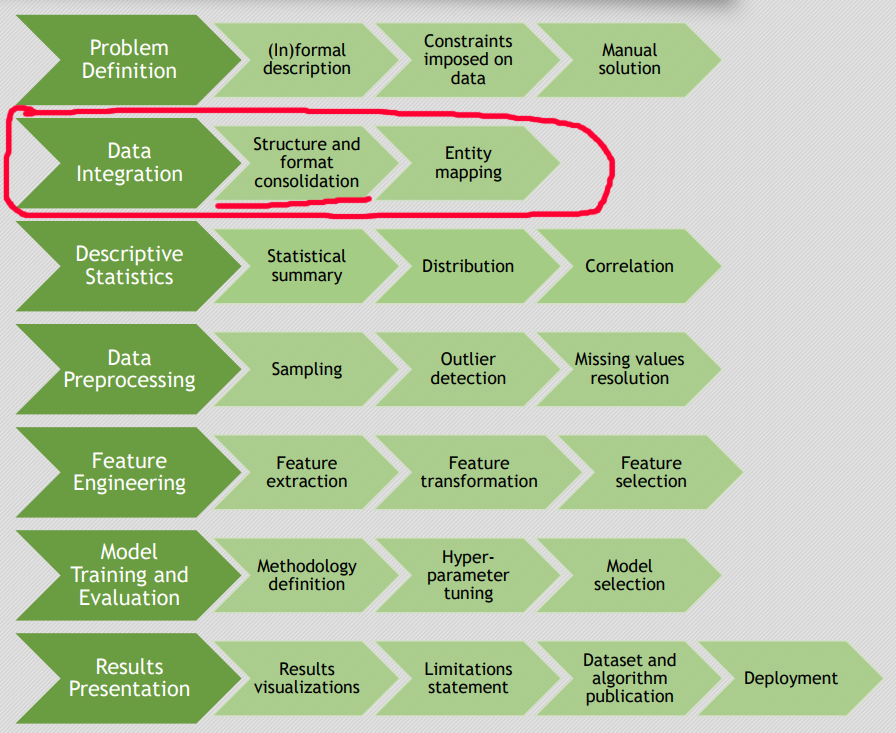

In [1]:
from IPython.display import Image
Image('img/ML_Workflow.PNG')

# O com nejdem hovorit

* Nejdem opisovat vsetky mozne record linkage a entity mapping metody (to je minimalne na samostatnu prednasku)
* Nejdem opisovat komplexne ETL nastroje a postupy na spajanie tabuliek a roznych databaz (na to tu mame dokonca samostatny predmet)

# Obsah dnesnej prezentacie

* Intro do pouzivania kniznic Pandas, Matplotlib a Numpy
* Ako pouzit tieto kniznice na zakladne upravovanie formy dat (data cleaning, reshaping, wrangling)
* Velmi lahke zaklady explorativnej analyzy a prace s chybajucimi hodnotami

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Na co nam je Pandas?
* importovanie dat zo standardnych formatov
* vycistit
* pozriet sa do dat (statistiky, sampling, zakladne grafy)
* posunut data na analyzu / trenovanie modelov

### Co je Pandas?
* Python komunita sa inspirovala a ukradla to dobre z `data.frame` struktury v R alebo obdobnych struktur v Matlabe alebo Octave
* Umoznuje zakladne operacie s datami, sampling, group by, merge, ...
* Ako zaklad je pouzite NumPy pole

### Zakladne ulohy
* Spracovanie chybajucich udajov (.dropna(), pd.isnull())
* Merge, join (concat, join)
* Group
* Zmena tvaru dat (pivotovanie) (stack, pivot)
* Praca s casovymi radmi (resampling, timezones, ..)
* Kreslenie

## Nieco k Numpy

In [3]:
pole = [1,2,3]
pole * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [4]:
np_pole = np.array([1,2,3])
np_pole * 3

array([3, 6, 9])

In [5]:
x = np.arange(20).reshape(4, 5) # skusit viacere dimenzie
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [6]:
x.shape

(4, 5)

In [7]:
x.ndim

2

In [8]:
x.sum(axis=1)

array([10, 35, 60, 85])

## Viacero typov cisel

In [9]:
x.dtype

dtype('int64')

In [10]:
a = np.array([.1,.2])
print(a)
a.dtype

[ 0.1  0.2]


dtype('float64')

In [11]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
print(c)
c.dtype

[[ 1.+0.j  2.+0.j]
 [ 3.+0.j  4.+0.j]]


dtype('complex128')

In [12]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [13]:
np.ones((2,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [14]:
np.repeat(3, 10).reshape([2,5])

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [15]:
np.linspace(0, 2, 9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [16]:
x = np.linspace( 0, 2*np.pi, 100 )
f = np.sin(x)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


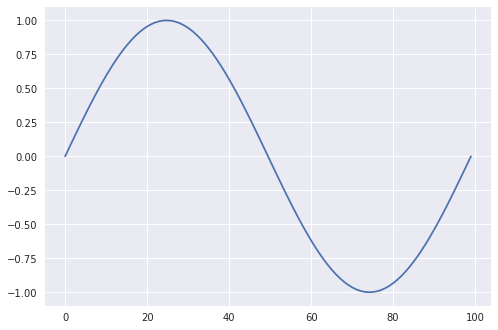

In [17]:
plt.plot(f)

## Maticove operacie

In [18]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )

In [19]:
A

array([[1, 1],
       [0, 1]])

In [20]:
B

array([[2, 0],
       [3, 4]])

In [21]:
np.transpose(B)

array([[2, 3],
       [0, 4]])

In [22]:
A*B

array([[2, 0],
       [0, 4]])

In [23]:
A.dot(B) # np.dot(A, B)

array([[5, 4],
       [3, 4]])

## Vyberanie prvkov

In [24]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [25]:
a[2]

8

In [26]:
a[2:5]

array([ 8, 27, 64])

In [27]:
a[2:6:2]

array([ 8, 64])

In [28]:
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

In [29]:
a[ : :-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000])

## Vyberanie prvkov z viacrozmerneho pola

In [30]:
b = np.arange(20).reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [31]:
b[2,3]

13

In [32]:
b[2,]

array([10, 11, 12, 13, 14])

In [33]:
b[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

In [34]:
b[:,2:4]

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18]])

Dalsie operacie si pozrite 
* tu https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* a tu https://docs.scipy.org/doc/numpy-dev/reference/index.html

## Nejake ukazky k Pandas

Pandas pouziva Numpy pole a nad nim si postavili typ `Series` a `DataFrame`

In [35]:
s = pd.Series([0,1,2,3,4])
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [36]:
# k numpy polu je pridany explicitny index 
s.index

RangeIndex(start=0, stop=5, step=1)

In [37]:
s.values

array([0, 1, 2, 3, 4])

In [38]:
s[0]

0

In [39]:
# na rozdiel od numpy vsak index moze byt aj nieco ine ako cislo
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [40]:
s2['c']

2

In [41]:
s2[2]

2

In [42]:
s2.c

2

In [43]:
# na vytvorenie Series objektu sa da pouzit aj asociatyvne pole
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

In [44]:
population['France']

64.299999999999997

In [45]:
# kedze je to postavene na Numpy, tak vieme robit vsetky zaujimave operacie
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

In [46]:
# index ma implicitne dane poradie, takze sa da robit rozsah
population['Belgium':'Netherlands']

Belgium        11.3
France         64.3
Germany        81.3
Netherlands    16.9
dtype: float64

In [47]:
population.mean()

47.739999999999995

Da sa pristupovat k prvkom tak, ako sme na to zvyknuti z R

In [48]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [49]:
population > 20

Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
dtype: bool

In [50]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

No a `DataFrame` je vlastne multidimenzionalny `Series`

In [51]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [52]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [53]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

In [54]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

In [55]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

In [56]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [57]:
countries.describe()

,area,population
count,5.000000,5.000000
mean,269042.800000,47.740000
std,264012.827994,31.519645
min,30510.000000,11.300000
25%,41526.000000,16.900000
50%,244820.000000,64.300000
75%,357050.000000,64.900000
max,671308.000000,81.300000


In [58]:
categorical = countries.dtypes[countries.dtypes == "object"].index
print(categorical)

countries[categorical].describe()

Index(['capital', 'country'], dtype='object')


,capital,country
count,5,5
unique,5,5
top,Berlin,United Kingdom
freq,1,1


In [59]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


a vieme teraz velmi jednoducho pristupovat k jednotlivym stlpcom

In [60]:
countries.area # countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [61]:
countries['population']*1000000 / countries['area'] # hustota zaludnenia

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

In [62]:
# vieme si jednoducho vyrobit novy stlpec
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


In [63]:
# a na zaklade neho napriklad vyberat riadky
countries[countries['density'] > 300]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
Netherlands,41526,Amsterdam,16.9,406.973944


In [64]:
# vieme potom napriklad usporiadavat
countries.sort_values(by='density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


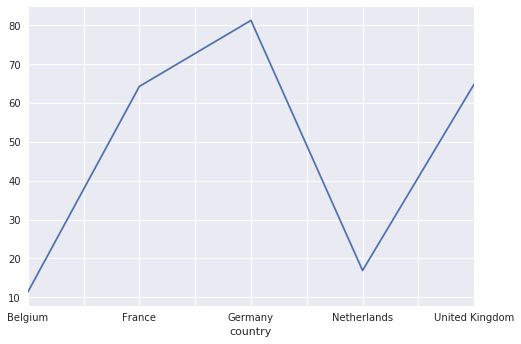

In [65]:
# velmi silna vlastnost je priamociare vykreslovanie
countries.population.plot()
# countries.density.plot(kind='bar')
# countries.plot()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


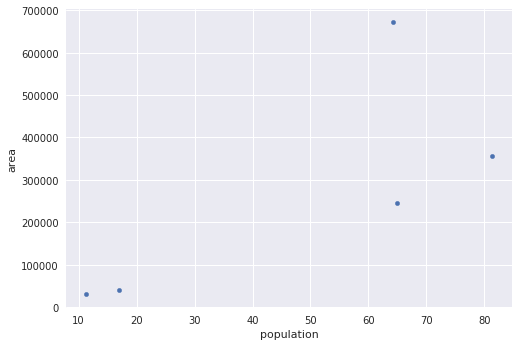

In [66]:
countries.plot(kind='scatter', x='population', y='area')

Kedze nam v `DataFrame` pribudla moznost vyberat stlpce podla nazvu, tak sa nam trochu skomplikovalo vyberanie prvkov oproti Numpy. Musime rozoznavat 
* vyberanie podla nazvu a 
* podla pozicie.


In [67]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [68]:
countries[['area', 'density']]

,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


In [69]:
# ked ale chceme rozsah, tak nam to pristupuje k riadkom
countries['France':'Netherlands']

,area,capital,population,density
country,,,,
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944


Na pokrocilejsie vyberanie z tabulky pouzivame:
* `loc` a
* `iloc`

In [70]:
# pristup ku konkretnej bunke pomocou riadka a stlpca
countries.loc['Germany', 'area']

357050

In [71]:
# tu sa daju pouzit aj rozsahy na oboch rozmeroch
countries.loc['France':'Germany', :]

,area,capital,population,density
country,,,,
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202


In [72]:
# ale aj vymenovanie
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


In [73]:
# iloc vybera podla poradia. Toto je podobne pristupovaniu k prvkom ako v Numpy
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


In [74]:
# samozrejem, ze sa stale daju priradovat hodnoty
countries.loc['Belgium':'Germany', 'population'] = 10
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,10.0,370.370370
France,671308,Paris,10.0,95.783158
Germany,357050,Berlin,10.0,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


## Zmena tvaru dat pomocou Pandas

In [75]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
# df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4), 'D':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`unstack` presuva hodnoty v nejakom stlpci a vytvori z nich nazvy stlpcov

casto sa nam to hodi ak mame data, ktore su v trochu unej forme ako by sme potrebovali

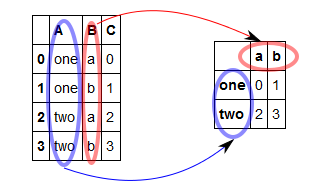

In [76]:
Image("img/stack.png")

In [77]:
df = df.set_index(['A', 'B']) # najskor si vyberieme stlpec, ktory pouzijeme ako index. 
# Ten druhy bude dodavat hodnoty do nazvov novych stlpcov
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [78]:
# teraz si povieme v ktorom stlpci su hodnoty a nechame to preskupit
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [79]:
# opacna transformacia je stack. zoberie nazvy stlpcov a spravi z nich hodnoty
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [80]:
# pivot je velmi podobny ako unstack, ale necha nastavit mena stlpcov a moze ich byt viac
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [81]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


In [82]:
# pivot_table je podobne ako pivot, ale dokaze pracovat s duplicitnymi stlpcami a necha vas definovat agregacnu funkciu
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [83]:
df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum) #aggfunct je defaultne np.mean

B,a,b
A,,
one,4,1
two,2,8


## Ok, skusme sa konecne pohrat s nejakymi datami

In [84]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')
data.head()
# Data su tvorene meraniami nejakej veliciny v jednotlivych hodinach dna. 
# Co den, to riadok. Kazda hodina ma zvlast stlpec + je tu stlpec pre nejaky flag, ktory nas nezaujima
# su tam nejak divne hodnoty, ktore by tam asi nemali byt -999 a -9999
# datum bude asi index
# v subore nieje hlavicka

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


In [85]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
# vela upratovania dat vieme spravit uz pri nacitani
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [86]:
# skusime povyhadzovat tie flagy, ktore nas nezaujimaju. Zhodou okolnosti je to kazdy druhy stlpec
data = data.drop(data.columns[1::2], axis=1)
data.head()

,1,3,5,7,9,11,13,15,17,19,...,29,31,33,35,37,39,41,43,45,47
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
["{:02d}".format(i) for i in range(len(data.columns))]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [88]:
# mam nejako rozsypane nazvy stlpcov
data.columns = ["{:02d}".format(i) for i in range(len(data.columns))]
data.head()

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data = data.stack()
data.head()

1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [90]:
type(data) # vysledok preusporiadania je viacdimenzionaly Series objekt a nie DataFrame. Ja chcem mat pekny data frame, tak s tim nieco spravime

pandas.core.series.Series

In [91]:
filename

'data/BETR8010000800100hour.1-1-1990.31-12-2012'

In [92]:
# mohli by sme nejak normalne poemnovat stlpec
import os
_, fname = os.path.split(filename)
station = fname[:7]
print(filename)
print(station)

data/BETR8010000800100hour.1-1-1990.31-12-2012
BETR801


In [93]:
data = data.reset_index(name=station) #reset index mi z toho sprav data frame
# data = data.reset_index() #reset index mi z toho sprav data frame
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,0,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [94]:
data = data.rename(columns = {0:'date', 'level_1':'hour'})
data.head()

,date,hour,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [95]:
# teraz tomu vyrobime novy index z datumu a hodiny
data.index = pd.to_datetime(data['date'] + ' ' + data['hour'])
data.head()

,date,hour,BETR801
1990-01-02 09:00:00,1990-01-02,09,48.0
1990-01-02 12:00:00,1990-01-02,12,48.0
1990-01-02 13:00:00,1990-01-02,13,50.0
1990-01-02 14:00:00,1990-01-02,14,55.0
1990-01-02 15:00:00,1990-01-02,15,59.0


In [96]:
# a zmazeme nepotrebne stlpce
data = data.drop(['date', 'hour'], axis=1)
data.head()
# Teraz uz mame data, s ktorymi sa uz da nieco robit

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


Ja mam tych suborov viac. Kazdy obsahuje data z inej meracej stanice. Aby som zjednodusil prezentaciu, tak predchadzajuci kod som dal do cyklu a vlozil do skriptu

In [97]:
import airbase
no2 = airbase.load_data()

In [98]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN


In [99]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


In [100]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    170794 non-null float64
BETN029    174807 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 7.6 MB


In [ ]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,170794.000000,174807.000000,120384.000000,119448.000000
mean,47.914561,16.687756,40.040005,87.993261
std,22.230921,13.106549,23.024347,41.317684
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,23.000000,61.000000
50%,46.000000,12.000000,37.000000,88.000000
75%,61.000000,23.000000,54.000000,115.000000
max,339.000000,115.000000,256.000000,358.000000


In [ ]:
no2.plot(kind='box')

In [ ]:
no2['BETN029'].plot(kind='hist', bins=50)

In [ ]:
import seaborn

In [ ]:
seaborn.violinplot(no2)

In [ ]:
no2.plot(figsize=(12,6))
# mozem si vyplotovat surove data, ale je otazne, co mi to povie

In [ ]:
# mozem si povedat, ze chcem len nejaku mensiu cast
no2[-500:].plot(figsize=(12,6))

alebo pouzijem zaujimavejsie operacie s casovymi radmi

In [ ]:
no2.index # kedze index su casy, tak viem robit s nimi zaujimave veci

In [ ]:
no2["2010-01-01 09:00": "2010-01-01 12:00"] # napriklad definovat rozsahy pomocou stringu s datumom

In [ ]:
no2['2012'] # alebo takto vybrat vsetky data z jedneho konkretneho roku
# no2['2012'].head()
# no2['2012/03'] # alebo len data z marca

In [ ]:
# komponenty datumu su pristupne z indexu
# no2.index.hour
no2.index.year

In [ ]:
# a co je zaujimavejsie viem zmenit vzorkovaciu frekvenciu
no2.resample('D').mean().head()

In [ ]:
no2.resample('M').mean().plot()
# toto sa zda, ze povie uz trochu viac. Napriklad, ze je tu asi nejaka sezonnost

In [ ]:
no2.resample('A').mean().plot()
# a mozno aj nejaky dlhodoby trend

In [ ]:
no2['2012-3':'2012-4'].resample('D').mean().plot()
# mozno je tam aj nejaka tyzdenna sezonnost

In [ ]:
# mozem pouzit aj viacero agregacnych funkcii a porovnat si ich
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Dalsia casta operacia je groupby
urcite poznate z SQL

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

In [ ]:
df.groupby('key').aggregate('sum') # df.groupby('key').sum()

In [ ]:
no2['month'] = no2.index.month
no2.head()

In [ ]:
no2.groupby('month').mean()

In [ ]:
no2.groupby('month').mean().plot()

Otazka: ako by ste vyplotovali typycky denny priebeh tejto hodnoty pre rozne stanice?
<!--
no2.groupby(no2.index.hour).mean().plot()
-->

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


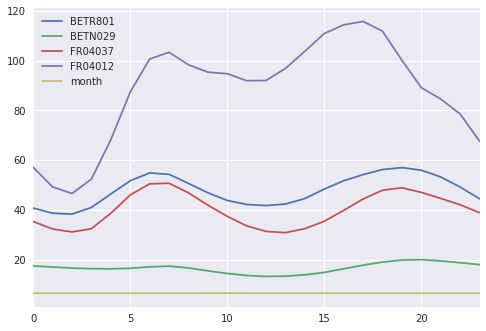

In [122]:
no2.groupby(no2.index.hour).mean().plot()

Otazka: aky je rozdiel v priebehu hodnot medzi typickym dnom v tyzdni a cez vikend pre stanicu FR04012?
<!--
no2['weekday'] = no2.index.weekday
no2['weekend'] = no2['weekday'].isin([5, 6])
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.plot()
-->

In [123]:
no2['weekday'] = no2.index.weekday
no2['weekend'] = no2['weekday'].isin([5, 6])
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend

BETR801    BETN029    FR04037     FR04012     month   weekday
weekend                                                                    
False   0   40.008066  17.487512  34.439398   52.094663  6.520355  1.998157
        1   38.281875  17.162671  31.585121   44.721629  6.518121  1.997315
        2   38.601189  16.800076  30.865143   43.518539  6.520511  2.000000
        3   42.633946  16.591031  32.963500   51.942135  6.518038  2.002360
        4   49.853566  16.791971  40.780162   72.547472  6.514098  2.003883
        5   57.000099  17.256512  50.219003   96.932865  6.517195  2.005929
        6   61.312500  18.187659  56.234606  113.867697  6.522207  2.007516
        7   60.542276  18.706022  56.802452  116.358708  6.527341  2.007006
        8   56.049316  17.909435  52.202006  108.076404  6.518201  2.002060
        9   51.618659  16.536089  46.177208  102.901124  6.531600  1.999828
        10  48.090447  15.417309  40.794929  101.318539  6.543594  1.996217
        11  46.208685  14.599070  36.278908   97.839607  6.541545  2.000514
        12  45.667983  14.089894  33.677069   97.590169  6.530849  2.003418
        13  46.323241  14.287397  33.080524  102.801404  6.523283  2.004419
        14  49.119567  14.874421  34.940652  110.393539  6.515228  2.002030
        15  53.166964  15.890269  38.152689  117.804494  6.516619  2.001012
        16  55.854041  17.412545  42.561159  120.345787  6.524499  2.000842
        17  57.502576  18.881042  46.817498  120.258708  6.524194  2.001344
        18  58.991580  20.166072  49.993034  115.276404  6.522411  2.002686
        19  59.454434  20.920805  50.483143  102.512079  6.522994  2.001846
        20  58.009376  20.928127  48.307049   90.561517  6.522213  2.001341
        21  54.920835  20.353295  45.635274   85.630056  6.521768  2.001507
        22  50.590763  19.612481  42.766230   79.060955  6.525063  2.002347
        23  45.552726  18.754721  39.144330   67.064607  6.523881  2.001341
True    0   42.606821  17.409112  37.634898   69.817219  6.520084  5.499582
        1   39.698565  16.762607  34.254380   60.697248  6.525523  5.500000
        2   37.649595  16.146081  31.844429   54.407904  6.520868  5.500000
        3   36.971797  15.843705  31.159075   53.534933  6.526778  5.498745
        4   37.908454  15.150333  33.395235   57.472830  6.521245  5.498107
        5   38.839756  14.742748  35.461107   63.452364  6.508024  5.498733
        6   39.293317  14.541388  36.091100   67.640790  6.510386  5.498516
        7   39.310614  14.176897  35.424667   70.883557  6.514493  5.497442
        8   38.227912  13.710015  33.554310   73.982357  6.529261  5.498505
        9   36.264925  12.986605  31.255781   76.643613  6.541578  5.500213
        10  34.041564  12.148734  28.892081   78.394495  6.522053  5.500000
        11  32.793639  11.360029  26.868956   77.227946  6.510746  5.500211
        12  32.570938  11.261769  25.524177   78.203246  6.516835  5.500000
        13  32.870079  11.160587  25.286615   82.195483  6.526692  5.499369
        14  33.701270  11.509962  26.316048   87.400141  6.532462  5.498735
        15  36.822394  12.341492  28.693062   93.760762  6.535354  5.500842
        16  41.558034  13.643806  32.994394   99.649965  6.530004  5.499371
        17  46.050928  15.062559  38.343378  104.674665  6.523329  5.499369
        18  49.381548  16.251542  42.784863  103.249118  6.524969  5.499790
        19  50.891745  17.120934  44.948844   94.282992  6.526382  5.500000
        20  50.844623  17.661709  43.909601   85.618913  6.523411  5.500418
        21  49.080095  17.339810  42.119832   82.027523  6.516318  5.499582
        22  45.672611  16.655107  40.324457   77.357092  6.511735  5.499581
        23  41.806791  16.093989  38.213735   69.081157  6.514453  5.499791

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


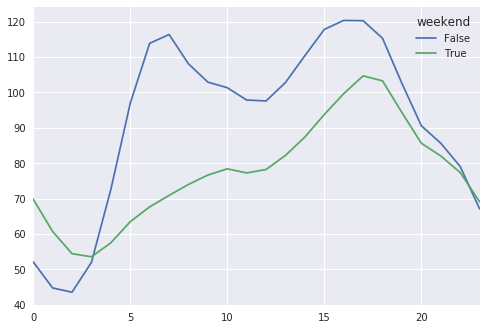

In [125]:
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.plot()

# Priklad analyzy s pouzitim ineho datasetu
tentokrat to nebudu casove rady, ale klasicky dataset na predvadzanie kalsifikacie Iris

In [126]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()
# toto je trochu spotvoreny dataset kvetiniek

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [128]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [129]:
categorical = iris_data.dtypes[iris_data.dtypes == "object"].index
print(categorical)

iris_data[categorical].describe()

Index(['class'], dtype='object')


,class
count,150
unique,5
top,Iris-virginica
freq,50


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


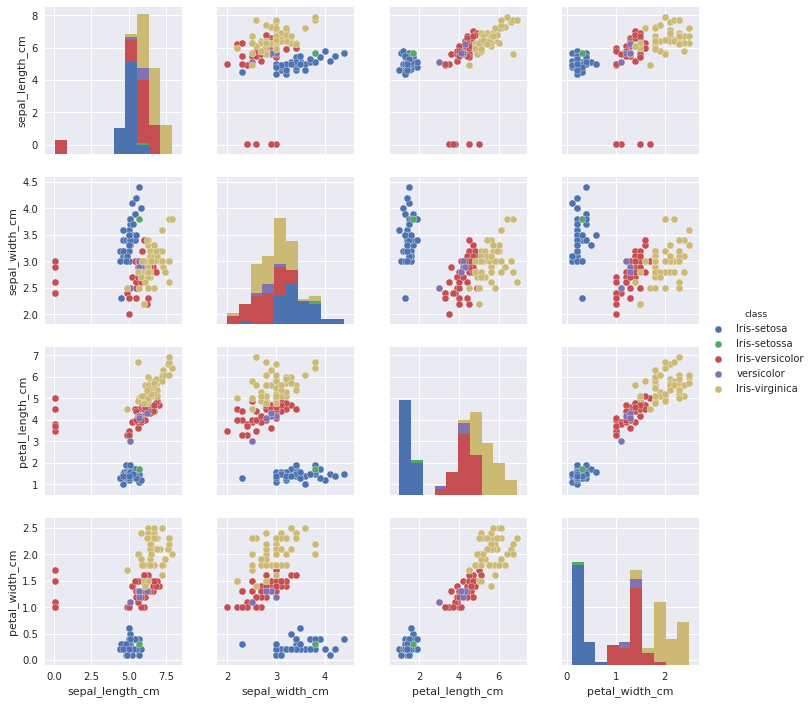

In [130]:
seaborn.pairplot(iris_data.dropna(), hue='class')

In [131]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


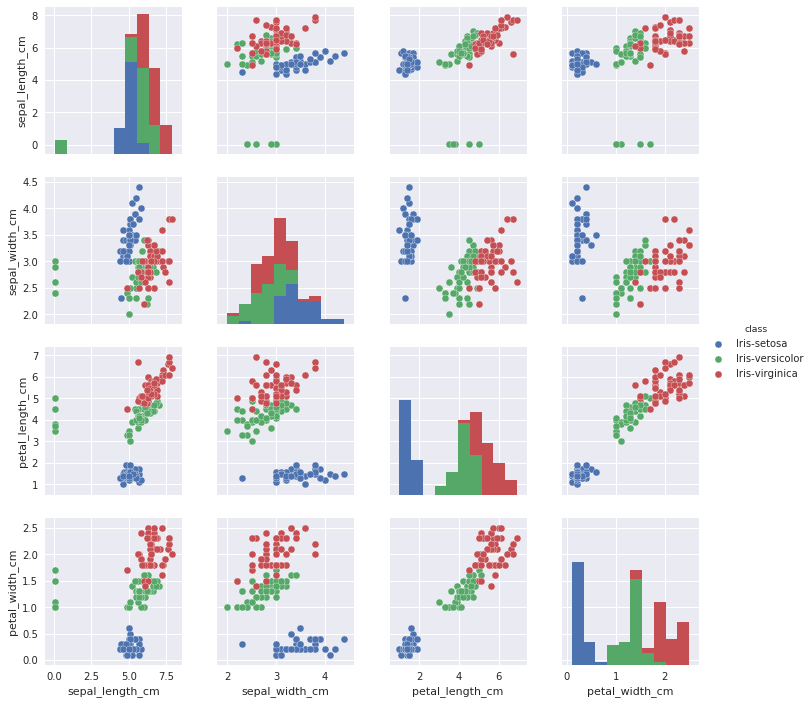

In [132]:
seaborn.pairplot(iris_data.dropna(), hue='class')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


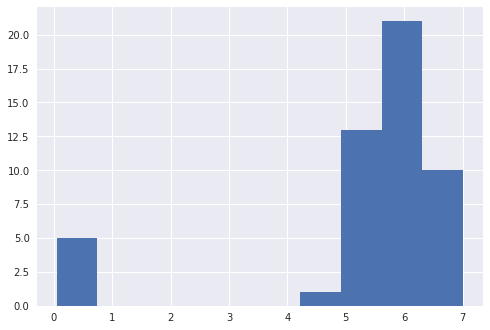

In [133]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


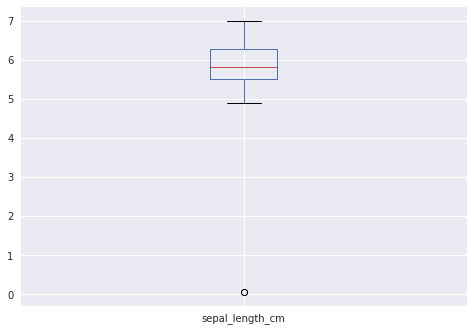

In [134]:
plt.rc("lines", markeredgewidth=0.5)
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].plot(kind='box')

In [135]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 ), 'sepal_length_cm']

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

In [ ]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1 ), 'sepal_length_cm']

In [ ]:
mask = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 )

iris_data.loc[mask, 'sepal_length_cm'] = iris_data.loc[mask, 'sepal_length_cm'] * 100

In [ ]:
iris_data.loc[mask, 'sepal_length_cm']

In [ ]:
seaborn.pairplot(iris_data.dropna(), hue='class')

## Skusme sa pozriet este na tie chybajuce hodnoty

In [ ]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

In [ ]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [ ]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

In [ ]:
seaborn.pairplot(iris_data, hue='class')

# Sumar co si zobrat z tejto explorativnej analyzy

* Uisite sa, ze data su kodovane spravne (najcastejsie sa treba pozriet manualne do dat)
* Uistite sa, ze data spadaju do ocakavaneho rozsahu a vsetky maju ocakavany tvar (napriklad format casu)
* Porieste chybajuce data napriklad vyhodenim alebo nahradenim priemerom (priemer musi byt s ohladom na triedu)
* Nikdy nesahajte do dat manualne. Vzdy pouzivajte kod, ktory si odlozite a pouzijete vzdy ked budete opakovat experiment. Chceme aby bola analyza reprodukovatelna
* Spravte si grafy vsetkeho, co sa len da, aby ste si vizualne potvrdili, ze nieco je tak ako by malo byt

## SQL v Pandas

In [ ]:
from pandasql import sqldf

In [ ]:
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

In [ ]:
type(meat)

In [ ]:
meat.head()

In [ ]:
births.head()

In [ ]:
data = {'meat': meat}

In [ ]:
sqldf('select * from meat limit 10', data)

In [ ]:
data2 = {'meat2': meat}

In [ ]:
sqldf('select * from meat2 limit 10', data2)

In [ ]:
sqldf('select * from meat limit 10', locals())

In [ ]:
sqldf('select * from births limit 10', locals())

In [ ]:
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = sqldf(q, locals())
print(joined.head())

Pandasql bezi na SQLite3, takze vsetky klasicke opercaie v SQL viete robit aj tu. Funguju podmienky, vnorene dopyty, joiny, union, funkcie, ...

# Zopar dalsich uzitocnych veci pri praci s Pandas DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

In [ ]:
# premenovanie vybranych stlpcov
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df.head()

## transformacia hodnot v stlpci

In [ ]:
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df.head()

## Pridanie stlpcu

In [ ]:
df['team'] = pd.Series('', index=df.index)
df['position'] = pd.Series('', index=df.index)
df.head()

## Transformacia ineho stlpca  a naplnenie dalsich

In [ ]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)
df.head()

## Zistenie, kolko stlpcov ma prazdne hodnoty

In [ ]:
df.shape[0] - df.dropna().shape[0]

## Vyber riadkov, kde su prazdne hodnoty

In [ ]:
df[df['assists'].isnull()]

## Vyber plnych riadkov

In [ ]:
df[df['assists'].notnull()]
# df[~df['assists'].isnull()]

## Nahradzanie prazdnych hodnot

In [ ]:
# predtym sme to robili manulane. 
# iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width

# Da sa na to pouzit takato pekna funkcia
df.fillna(value=0, inplace=True)
df

## Existuje vsak este elegantnejsi sposob

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)            
               
df.head()

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df[['games', 'assists']] = imp.fit_transform(df[['games', 'assists']].values)
df.head()

Pozor, toto doplnanie neberie do uvahy triedu

In [ ]:
df.games.mean()

In [ ]:
df[df.position == 'Forward'].games.mean()

## Spajanie podmienok

In [ ]:
df[ (df['team'] == 'Arsenal') | (df['team'] == 'Chelsea') ]

In [ ]:
df[ (df['team'] == 'Arsenal') & (df['position'] == 'Forward') ]

# Nejake zdroje na studium
* http://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb
* http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb
* [Pandas Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf), [nejaky komentar k tomu](http://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html)

# Nejake dalsie nastroje
* [OpenRefine](http://openrefine.org/) - standalone nastroj na cistenie a pozeranie sa do dat
* [Trifacta](https://www.trifacta.com/products/wrangler/)